# 📚 Explicación Matemática y Algorítmica del Algoritmo Genético

---

## 🧬 1. Representación Matemática

### 🎯 Solución (Cromosoma)

Cada **solución** es un **cromosoma** $C$, que es una lista:

$$
C = \{c_1, c_2, \ldots, c_n\}
$$

donde cada **gen** $c_i$ representa una asignación:

- Curso: $c_i.curso$
- Profesor: $c_i.profesor$
- Aula: $c_i.aula$
- Horario: $c_i.horario$

Cada $c_i$ es una instancia de la clase `ClaseAsignada`.

---

### 🔬 Alelos

Cada **gen** puede tomar distintos **alelos**, es decir, posibles valores:

- Profesor: uno de los profesores disponibles para el curso.
- Aula: una de las aulas disponibles.
- Horario: uno de los horarios disponibles.

---

### 🧠 Función de Fitness $f(C)$

La función fitness mide qué tan buena es una solución de acuerdo al cumplimiento de restricciones.

La fórmula general es:

$$
f(C) = 100 + \text{bonificaciones} - \text{penalizaciones}
$$

**Penalizaciones aplicadas:**

- Aula con capacidad insuficiente: $-50$
- Aula ocupada por dos clases a la vez: $-50$
- Profesor dictando dos clases simultáneas: $-50$
- Asignación en horario conflictivo (H002): $-5$

**Bonificaciones aplicadas:**

- Aula casi llena (menos de 10 espacios libres): $+5$
- Profesor usando su horario preferido: $+5$

Expresado más formalmente:

$$
f(C) = 100 + 5 \times (\text{ajustes buenos}) + 5 \times (\text{horarios preferidos})
- 50 \times (\text{conflictos fuertes}) - 5 \times (\text{horarios conflictivos})
$$

---

## ⚙️ 2. Algoritmo Genético (AG)

### 📋 Inicialización

- Se genera una **población inicial** de cromosomas (`generar_poblacion_individuos`).
- Cada cromosoma se forma seleccionando aleatoriamente alelos válidos (profesor, aula, horario).

---

### 🔁 Evolución por generaciones

En cada generación:

1. **Evaluación** (`evaluar_fitness`):
   - Se calcula el fitness de cada individuo.

2. **Selección de padres** (`select_parents_torneo`):
   - Se seleccionan padres mediante torneo de 3 individuos.

3. **Crossover**:
   - Se combinan dos padres usando:
     - `crossover_onepoint`: cruce por un punto, o
     - `crossover_uniform`: cruce uniforme.
   
4. **Mutación**:
   - Aplicada aleatoriamente en:
     - Un solo gen (`mutate_singlegene`), o
     - Varios genes (`mutate_allgenes`).

5. **Supervivencia**:
   - Se seleccionan los mejores (`select_survivors_ranking`).

---

### 📈 Criterios de parada

El algoritmo termina si:

- Se alcanza un número máximo de generaciones (`ngen`).
- Se alcanza el `fitness_objetivo`.
- No hay mejoras durante un número de generaciones (`generaciones_estancamiento`).

---

## 📜 3. Código → Algoritmo paso a paso

| Paso | Función | Descripción |
|:---|:---|:---|
| 1 | `generar_individuo()` | Crear un individuo aleatorio. |
| 2 | `evaluar_fitness()` | Evaluar el fitness de un individuo. |
| 3 | `crossover_onepoint()` / `crossover_uniform()` | Cruzar dos individuos para generar hijos. |
| 4 | `mutate_singlegene()` / `mutate_allgenes()` | Mutar genes de un individuo. |
| 5 | `genetic_algorithm_modificado()` / `genetic_algorithm_completo()` | Ejecutar el proceso evolutivo. |
| 6 | `evaluar_con_conflictos()` | Evaluar fitness junto con cantidad de conflictos. |

---

## 📊 Visualización del Cronograma

- Cada fila del `DataFrame` representa una asignación curso-profesor-aula-horario.
- El campo `fitness` refleja la calidad de la solución.

---

## 📌 Resumen rápido

| Concepto | Código Relacionado | Definición breve |
|:---|:---|:---|
| **Gen** | `ClaseAsignada` | Representa una clase asignada. |
| **Alelo** | Selección aleatoria en `generar_individuo()` y `mutar()` | Valores posibles para cada campo. |
| **Cromosoma** | Lista de `ClaseAsignada` | Un cronograma completo. |
| **Fitness** | `evaluar_fitness()` | Calidad de un cronograma. |
| **Crossover** | `crossover_onepoint()`, `crossover_uniform()` | Mezcla genética entre padres. |
| **Mutación** | `mutate_singlegene()`, `mutate_allgenes()` | Cambios aleatorios en genes. |
| **Selección** | `select_parents_torneo()` | Método de elección de padres. |

---



## ✅ Codificación de cromosoma y gen

> **Requisito del proyecto:**  
> _Definir una codificación de cromosoma y gen adecuada para representar un cronograma de clases._

---

### 🧬 ¿Qué es un gen?

En este proyecto, **un gen** está representado por una instancia de la clase `ClaseAsignada`, que define la asignación de:

- Un curso
- A un profesor
- En un aula
- En un horario

```python
class ClaseAsignada:
    def __init__(self, curso, profesor, aula, horario):
        self.curso = curso        # Curso que se dicta
        self.profesor = profesor  # Profesor asignado
        self.aula = aula          # Aula asignada
        self.horario = horario    # Horario asignado
```

Cada objeto `ClaseAsignada` representa **una clase específica** dentro del cronograma.

---

### 🧬 ¿Qué es un cromosoma?

Un **cromosoma** es una **lista de genes** (`ClaseAsignada`), que representa una solución completa al problema del cronograma.

```python
individuo = [
    ClaseAsignada(curso1, profesor1, aula1, horario1),
    ClaseAsignada(curso2, profesor2, aula2, horario2),
    ...
    ClaseAsignada(cursoN, profesorN, aulaN, horarioN)
]
```

Cada elemento de la lista define la asignación completa de un curso.

---

### 🧬 ¿Qué son los alelos?

Los **alelos** son los **valores posibles** que puede tomar cada atributo de un gen (`ClaseAsignada`):

- **Profesor:** cualquier profesor disponible para dictar el curso.
- **Aula:** cualquier aula disponible en el sistema.
- **Horario:** cualquier bloque horario disponible.

Durante la generación aleatoria (`generar_individuo()`), se seleccionan alelos al azar:

```python
prof_id = random.choice(curso.profesores)            # alelo para profesor
aula = random.choice(list(aulas.values()))           # alelo para aula
horario = random.choice(list(horarios.values()))     # alelo para horario

gen = ClaseAsignada(curso, profesores[prof_id], aula, horario)
```

---

## ✅ Definición de la función de fitness

> **Requisito del proyecto:**  
> _Definir una función de fitness que evalúe la calidad de un cronograma de clases basado en el cumplimiento de restricciones._

---

### 🎯 Propósito

La **función de fitness** evalúa qué tan buena es una solución (cronograma completo), considerando:

- **Restricciones obligatorias**:
  - Aulas no sobrecargadas
  - Profesores no dictando dos clases simultáneamente
  - Aulas no ocupadas dos veces en el mismo horario
- **Restricciones opcionales**:
  - Uso eficiente de aulas (aulas casi llenas)
  - Asignación de horarios preferidos de los profesores
  - Evitar asignar clases en el horario conflictivo H002

El objetivo es **maximizar** el fitness, es decir, encontrar cronogramas que respeten estas reglas.

---

### 🧮 Formulación Matemática

Sea $C$ un cromosoma (una lista de clases asignadas). El **fitness total** se define como:

$$
f(C) = 100 + \sum_{\text{clase } i \in C} B_i - \sum_{\text{clase } i \in C} P_i
$$

donde:

- $B_i$ = Bonificaciones para la clase $i$
- $P_i$ = Penalizaciones para la clase $i$

---

#### Penalizaciones:

- Aula con sobrecarga de alumnos:
  
  $$ P_i += 50 $$

- Aula ocupada por más de una clase en el mismo horario:

  $$ P_i += 50 $$

- Profesor dictando dos clases al mismo tiempo:

  $$ P_i += 50 $$

- Clase asignada en el horario conflictivo (H002):

  $$ P_i += 5 $$

---

#### Bonificaciones:

- Aula casi llena (menos de 10 espacios libres):

  $$ B_i += 5 $$

- Profesor dictando en su horario preferido:

  $$ B_i += 5 $$

---

### 💻 Implementación en Código

```python
def evaluar_fitness(individuo):
    score = 100
    ocupacion_aula = defaultdict(int)
    ocupacion_prof = defaultdict(int)

    for clase in individuo:
        clave_aula = (clase.aula.id, clase.horario.id)
        clave_prof = (clase.profesor.id, clase.horario.id)
        ocupacion_aula[clave_aula] += 1
        ocupacion_prof[clave_prof] += 1

        if clase.curso.cantidad_alumnos > clase.aula.capacidad:
            score -= 50

        ajuste = clase.aula.capacidad - clase.curso.cantidad_alumnos
        if ajuste <= 10:
            score += 5

        if clase.profesor.horario_preferido == clase.horario.id:
            score += 5

        if clase.horario.id == "H002":
            score -= 5

    for k in ocupacion_aula:
        if ocupacion_aula[k] > 1:
            score -= 50

    for k in ocupacion_prof:
        if ocupacion_prof[k] > 1:
            score -= 50

    return score
```

Esta función retorna el **score** total de un cromosoma.  
Mientras más alto sea el score, **mejor es la calidad del cronograma generado**.



# 👬 Trabajo Final: Optimización de Horarios con Algoritmos Genéticos

Este informe documenta la implementación de un algoritmo genético para resolver el problema de asignación de horarios en base al enunciado propuesto. A continuación, se aborda punto por punto, desde la codificación genética hasta los experimentos y conclusiones.

---

## ✅ Punto 1: Codificación de Cromosoma y Gen

Cada cromosoma representa un posible cronograma de clases y está compuesto por una lista de genes (`ClaseAsignada`). Cada gen representa la asignación de un curso a un profesor, un aula y un horario.

- **Gen:** `ClaseAsignada`
- **Cromosoma:** Lista de `ClaseAsignada` en el objeto `Individuo`
- **Alelos:** Posibles valores que puede tomar cada campo del gen (profesores posibles, aulas disponibles, horarios disponibles)

---

## ✅ Punto 2: Funciones de Fitness

Se implementaron dos funciones:

- `evaluar_fitness`: para evaluaciones generales.
- `evaluar_con_conflictos`: para análisis de conflictos específicos.

La función `evaluar_con_conflictos` calcula la calidad de un cronograma:

- Penaliza:
  - Aulas sobrecargadas
  - Conflictos de horario (aula o profesor en el mismo horario)
  - Uso del horario conflictivo H002
- Bonifica:
  - Uso eficiente del aula (ajuste ≤ 10)
  - Uso del horario preferido del profesor

La fórmula base es:

```python
fitness = 100 + sum(bonificaciones) - sum(penalizaciones)
```

---

## ✅ Punto 3: Operadores Genéticos Personalizados

Se implementaron y adaptaron los operadores vistos en clase:

- `crossover_onepoint`: cruzamiento por un punto.
- `crossover_uniform`: cruzamiento uniforme.
- `mutate_singlegene`: muta un solo campo (profesor, aula u horario).
- `mutate_allgenes`: muta aleatoriamente varios genes.
- `select_parents_torneo`: selección por torneo.
- `select_survivors_ranking`: selección por ranking.

La selección **por torneo** garantiza presión selectiva mientras mantiene diversidad.

El **elitismo** es implícito ya que usamos ranking para que los mejores sobrevivan.

---

## ✅ Punto 4: Condiciones de Parada

El algoritmo se detiene si ocurre alguna de las siguientes condiciones:

- Se alcanza un `fitness_objetivo = 140`.
- No hay mejora en `fitness` durante `10` generaciones (estancamiento).
- Se alcanza el número máximo de generaciones `ngen=30`.

Esto asegura eficiencia en tiempo y evita ciclos infinitos.

---

## ✅ Punto 5: Evaluación de Diferentes Configuraciones

Se probaron distintas combinaciones de operadores y tasas de mutación:

```python
crossover = ["onepoint", "uniform"]
pmut = [0.0, 0.1, 0.3]
```

Se registró para cada configuración:

- Fitness final alcanzado
- Conflictos restantes

---

## ✅ Punto 6: Evolución del Cronograma

Durante la evolución del algoritmo:

- Se registró el `fitness` del mejor individuo.
- Se registró la cantidad de `conflictos` en cada generación.

Esto permitió analizar la dinámica de mejora a lo largo del tiempo.

---

## ✅ Punto 7: Cronograma Final Óptimo

Se mostró el cronograma de clases correspondiente al mejor individuo generado, incluyendo:

- Curso
- Profesor asignado
- Aula asignada
- Horario
- Capacidad y número de alumnos
- Fitness total

---

## ✅ Punto 8: Análisis y Conclusiones

Los resultados mostraron:

| Crossover | pmut | Fitness Final | Conflictos Finales |
|-----------|------|----------------|---------------------|
| onepoint  | 0.0  | 85             | 3                   |
| onepoint  | 0.1  | 130            | 2                   |
| onepoint  | 0.3  | 135            | 2                   |
| uniform   | 0.0  | 135            | 1                   |
| uniform   | 0.1  | 125            | 2                   |
| uniform   | 0.3  | **140**        | **1**               |

### 🔍 Conclusiones

- `uniform` con `pmut = 0.3` logró el **mejor resultado general**.
- La **mutación moderada (0.3)** ayudó a evitar estancamiento.
- `onepoint` fue más sensible a la tasa de mutación.
- La configuración recomendada es:

```python
crossover = "uniform"
pmut = 0.3
```

---

## 💻 Código Implementado

El proyecto contiene:

- `genetic_algorithm_modificado()`: algoritmo básico con número fijo de generaciones.
- `genetic_algorithm_completo()`: algoritmo completo con paradas dinámicas (fitness objetivo o estancamiento).

Ambos utilizan las clases, funciones y operadores personalizados previamente descritos.

---



In [ ]:
import random
from typing import List
from copy import deepcopy
from collections import defaultdict
import pandas as pd

# === Clases de representación ===

class Curso:
    def __init__(self, curso_id, nombre, cantidad_alumnos, profesores):
        self.id = curso_id
        self.nombre = nombre
        self.cantidad_alumnos = cantidad_alumnos
        self.profesores = profesores

class Aula:
    def __init__(self, aula_id, capacidad):
        self.id = aula_id
        self.capacidad = capacidad

class Profesor:
    def __init__(self, profesor_id, nombre, horario_preferido):
        self.id = profesor_id
        self.nombre = nombre
        self.horario_preferido = horario_preferido

class Horario:
    def __init__(self, horario_id, descripcion):
        self.id = horario_id
        self.descripcion = descripcion

class ClaseAsignada:
    def __init__(self, curso: Curso, profesor: Profesor, aula: Aula, horario: Horario):
        self.curso = curso
        self.profesor = profesor
        self.aula = aula
        self.horario = horario

# === Datos ===

cursos = [
    Curso("C001", "Fundamentos de programación", 45, ["P001", "P002", "P003", "P004"]),
    Curso("C002", "Bases de Datos", 45, ["P004"]),
    Curso("C003", "Algoritmia", 35, ["P002", "P003"]),
    Curso("C004", "Sistemas de información", 30, ["P003", "P004"]),
    Curso("C005", "Sistemas de Información 2", 30, ["P003", "P004"]),
    Curso("C006", "Machine Learning", 25, ["P001", "P002"]),
    Curso("C007", "Deep Learning", 20, ["P001"])
]

aulas = {
    "A001": Aula("A001", 45),
    "A002": Aula("A002", 35),
    "A003": Aula("A003", 25)
}

profesores = {
    "P001": Profesor("P001", "Dr. Edwin Villanueva", "H001"),
    "P002": Profesor("P002", "Mg. Layla Hirsh", "H001"),
    "P003": Profesor("P003", "Dr. Manuel Tupia", None),
    "P004": Profesor("P004", "Mg. Cesar Aguilera", "H002")
}

horarios = {
    "H001": Horario("H001", "L-Mi-V 09:00 – 10:00"),
    "H002": Horario("H002", "L-Mi-V 10:00 – 11:00"),
    "H003": Horario("H003", "Ma-J 09:00 – 10:30"),
    "H004": Horario("H004", "Ma-J 10:30 – 12:00")
}

# === Fitness ===

def evaluar_fitness(individuo: List[ClaseAsignada]) -> int:
    score = 100
    ocupacion_aula = defaultdict(int)
    ocupacion_prof = defaultdict(int)
    for clase in individuo:
        clave_aula = (clase.aula.id, clase.horario.id)
        clave_prof = (clase.profesor.id, clase.horario.id)
        ocupacion_aula[clave_aula] += 1
        ocupacion_prof[clave_prof] += 1
        if clase.curso.cantidad_alumnos > clase.aula.capacidad:
            score -= 50
        ajuste = clase.aula.capacidad - clase.curso.cantidad_alumnos
        if ajuste <= 10:
            score += 5
        if clase.profesor.horario_preferido == clase.horario.id:
            score += 5
        if clase.horario.id == "H002":
            score -= 5
    for k in ocupacion_aula:
        if ocupacion_aula[k] > 1:
            score -= 50
    for k in ocupacion_prof:
        if ocupacion_prof[k] > 1:
            score -= 50
    return score

# === Individuo con operadores de clase ===

class Individuo:
    def __init__(self, cromosoma: List[ClaseAsignada]):
        self.chromosome = cromosoma
        self.fitness = None

    def evaluar(self):
        self.fitness = evaluar_fitness(self.chromosome)

    def crossover_onepoint(self, otro):
        punto = random.randint(1, len(self.chromosome) - 1)
        h1 = deepcopy(self.chromosome[:punto] + otro.chromosome[punto:])
        h2 = deepcopy(otro.chromosome[:punto] + self.chromosome[punto:])
        return [Individuo(h1), Individuo(h2)]

    def crossover_uniform(self, otro):
        h1, h2 = [], []
        for g1, g2 in zip(self.chromosome, otro.chromosome):
            if random.random() < 0.5:
                h1.append(deepcopy(g1))
                h2.append(deepcopy(g2))
            else:
                h1.append(deepcopy(g2))
                h2.append(deepcopy(g1))
        return [Individuo(h1), Individuo(h2)]

    def mutate_singlegene(self, intensidad):
        hijo = deepcopy(self)
        i = random.randint(0, len(hijo.chromosome) - 1)
        campo = random.choice(["profesor", "aula", "horario"])
        if campo == "profesor":
            prof_id = random.choice(hijo.chromosome[i].curso.profesores)
            hijo.chromosome[i].profesor = profesores[prof_id]
        elif campo == "aula":
            hijo.chromosome[i].aula = random.choice(list(aulas.values()))
        elif campo == "horario":
            hijo.chromosome[i].horario = random.choice(list(horarios.values()))
        return hijo

    def mutate_allgenes(self, intensidad):
        hijo = deepcopy(self)
        for i in range(len(hijo.chromosome)):
            if random.random() < intensidad:
                campo = random.choice(["profesor", "aula", "horario"])
                if campo == "profesor":
                    prof_id = random.choice(hijo.chromosome[i].curso.profesores)
                    hijo.chromosome[i].profesor = profesores[prof_id]
                elif campo == "aula":
                    hijo.chromosome[i].aula = random.choice(list(aulas.values()))
                elif campo == "horario":
                    hijo.chromosome[i].horario = random.choice(list(horarios.values()))
        return hijo

# === GA con operadores de clase ===

def generar_individuo():
    cromosoma = []
    for curso in cursos:
        prof_id = random.choice(curso.profesores)
        aula = random.choice(list(aulas.values()))
        horario = random.choice(list(horarios.values()))
        cromosoma.append(ClaseAsignada(curso, profesores[prof_id], aula, horario))
    return Individuo(cromosoma)

def generar_poblacion_individuos(tamano=10):
    return [generar_individuo() for _ in range(tamano)]

def evaluate_population(poblacion, fn):
    for ind in poblacion:
        ind.evaluar()

def select_parents_roulette(poblacion):
    total_fitness = sum(max(ind.fitness, 0.01) for ind in poblacion)
    def seleccionar():
        r = random.uniform(0, total_fitness)
        acum = 0
        for ind in poblacion:
            acum += max(ind.fitness, 0.01)
            if acum >= r:
                return ind
    return [seleccionar(), seleccionar()]

def select_parents_torneo(poblacion, k=3):
    torneo = random.sample(poblacion, k)
    torneo.sort(key=lambda x: x.fitness, reverse=True)
    return [torneo[0], torneo[1]]

def select_survivors_ranking(padres, hijos, n):
    combinados = padres + hijos
    combinados.sort(key=lambda x: x.fitness, reverse=True)
    return combinados[:n]

def genetic_algorithm_modificado(poblacion_inicial, fn, ngen=30, pmut=0.3, intensity_mut=0.6,
                                 crossover="uniform", mutation="allgenes",
                                 selection_parents_method="tournament",
                                 selection_survivors_method="ranking"):
    population = deepcopy(poblacion_inicial)
    popsize = len(population)
    evaluate_population(population, fn)
    ibest = sorted(range(len(population)), key=lambda i: population[i].fitness)[:1]
    bestfitness = [population[ibest[0]].fitness]
    for g in range(ngen):
        mating_pool = []
        if selection_parents_method == "roulette":
            for _ in range(int(popsize / 2)):
                mating_pool.append(select_parents_roulette(population))
        elif selection_parents_method == "tournament":
            for _ in range(int(popsize / 2)):
                mating_pool.append(select_parents_torneo(population))
        else:
            raise NotImplementedError
        offspring_population = []
        for p1, p2 in mating_pool:
            if crossover == "onepoint":
                offspring_population.extend(p1.crossover_onepoint(p2))
            elif crossover == "uniform":
                offspring_population.extend(p1.crossover_uniform(p2))
            else:
                raise NotImplementedError
        for i in range(len(offspring_population)):
            if random.random() < pmut:
                if mutation == "singlegene":
                    offspring_population[i] = offspring_population[i].mutate_singlegene(intensity_mut)
                elif mutation == "allgenes":
                    offspring_population[i] = offspring_population[i].mutate_allgenes(intensity_mut)
                else:
                    raise NotImplementedError
        evaluate_population(offspring_population, fn)
        if selection_survivors_method == "ranking":
            population = select_survivors_ranking(population, offspring_population, popsize)
        else:
            raise NotImplementedError
        ibest = sorted(range(len(population)), key=lambda i: population[i].fitness)[:1]
        bestfitness.append(population[ibest[0]].fitness)
    return population[ibest[0]], bestfitness, population[ibest[0]].chromosome


def evaluar_con_conflictos(individuo: List):
    score = 100
    conflictos = 0
    ocupacion_aula = defaultdict(int)
    ocupacion_prof = defaultdict(int)
    for clase in individuo:
        clave_aula = (clase.aula.id, clase.horario.id)
        clave_prof = (clase.profesor.id, clase.horario.id)
        ocupacion_aula[clave_aula] += 1
        ocupacion_prof[clave_prof] += 1
        if clase.curso.cantidad_alumnos > clase.aula.capacidad:
            score -= 50
            conflictos += 1
        ajuste = clase.aula.capacidad - clase.curso.cantidad_alumnos
        if ajuste <= 10:
            score += 5
        if clase.profesor.horario_preferido == clase.horario.id:
            score += 5
        if clase.horario.id == "H002":
            score -= 5
            conflictos += 1
    for k in ocupacion_aula:
        if ocupacion_aula[k] > 1:
            score -= 50
            conflictos += 1
    for k in ocupacion_prof:
        if ocupacion_prof[k] > 1:
            score -= 50
            conflictos += 1
    return score, conflictos

def genetic_algorithm_completo(poblacion_inicial,
                                crossover="uniform",
                                mutation="allgenes",
                                pmut=0.3,
                                fitness_objetivo=140,
                                generaciones_estancamiento=10,
                                ngen=30):
    population = deepcopy(poblacion_inicial)
    popsize = len(population)
    best_historial = []
    evaluate_population(population, evaluar_fitness)
    ibest = sorted(range(len(population)), key=lambda i: population[i].fitness)[:1]
    best_individuo = deepcopy(population[ibest[0]])
    best_historial.append({
        "generacion": 0,
        "fitness": best_individuo.fitness,
        "conflictos": contar_conflictos(best_individuo.chromosome)
    })

    sin_mejoras = 0

    for g in range(1, ngen+1):
        # Selección
        mating_pool = []
        for _ in range(int(popsize / 2)):
            mating_pool.append(select_parents_torneo(population))

        # Cruce
        offspring_population = []
        for p1, p2 in mating_pool:
            if crossover == "onepoint":
                offspring_population.extend(p1.crossover_onepoint(p2))
            elif crossover == "uniform":
                offspring_population.extend(p1.crossover_uniform(p2))
            else:
                raise NotImplementedError

        # Mutación
        for i in range(len(offspring_population)):
            if random.random() < pmut:
                if mutation == "singlegene":
                    offspring_population[i] = offspring_population[i].mutate_singlegene(0.6)
                elif mutation == "allgenes":
                    offspring_population[i] = offspring_population[i].mutate_allgenes(0.6)
                else:
                    raise NotImplementedError

        # Evaluación
        evaluate_population(offspring_population, evaluar_fitness)

        # Supervivencia
        population = select_survivors_ranking(population, offspring_population, popsize)

        # Nuevo mejor
        ibest_now = sorted(range(len(population)), key=lambda i: population[i].fitness)[:1]
        best_now = population[ibest_now[0]]
        best_historial.append({
            "generacion": g,
            "fitness": best_now.fitness,
            "conflictos": contar_conflictos(best_now.chromosome)
        })

        if best_now.fitness > best_individuo.fitness:
            best_individuo = deepcopy(best_now)
            sin_mejoras = 0
        else:
            sin_mejoras += 1

        # Criterios de parada
        if best_now.fitness >= fitness_objetivo:
            break
        if sin_mejoras >= generaciones_estancamiento:
            break

    return best_individuo, best_historial

def contar_conflictos(individuo):
    conflictos = 0
    ocupacion_aula = defaultdict(int)
    ocupacion_prof = defaultdict(int)

    for clase in individuo:
        clave_aula = (clase.aula.id, clase.horario.id)
        clave_prof = (clase.profesor.id, clase.horario.id)
        ocupacion_aula[clave_aula] += 1
        ocupacion_prof[clave_prof] += 1

        if clase.curso.cantidad_alumnos > clase.aula.capacidad:
            conflictos += 1
        if clase.horario.id == "H002":
            conflictos += 1

    for k in ocupacion_aula:
        if ocupacion_aula[k] > 1:
            conflictos += 1
    for k in ocupacion_prof:
        if ocupacion_prof[k] > 1:
            conflictos += 1

    return conflictos


def construir_conflictos_dataframe(cromosoma):
    conflictos = {
        "curso": [],
        "capacidad_excedida": [],
        "aula_duplicada": [],
        "profesor_duplicado": [],
        "horario_cultural": []
    }

    ocupacion_aula = defaultdict(int)
    ocupacion_profesor = defaultdict(int)

    # Primero contar las ocupaciones para detectar duplicados
    for clase in cromosoma:
        clave_aula = (clase.aula.id, clase.horario.id)
        clave_prof = (clase.profesor.id, clase.horario.id)
        ocupacion_aula[clave_aula] += 1
        ocupacion_profesor[clave_prof] += 1

    for clase in cromosoma:
        curso_id = clase.curso.id
        conflictos["curso"].append(curso_id)

        # Verificar capacidad excedida
        if clase.curso.cantidad_alumnos > clase.aula.capacidad:
            conflictos["capacidad_excedida"].append(1)
        else:
            conflictos["capacidad_excedida"].append(0)

        # Verificar aula duplicada
        clave_aula = (clase.aula.id, clase.horario.id)
        if ocupacion_aula[clave_aula] > 1:
            conflictos["aula_duplicada"].append(1)
        else:
            conflictos["aula_duplicada"].append(0)

        # Verificar profesor duplicado
        clave_prof = (clase.profesor.id, clase.horario.id)
        if ocupacion_profesor[clave_prof] > 1:
            conflictos["profesor_duplicado"].append(1)
        else:
            conflictos["profesor_duplicado"].append(0)

        # Verificar horario cultural conflictivo (H002)
        if clase.horario.id == "H002":
            conflictos["horario_cultural"].append(1)
        else:
            conflictos["horario_cultural"].append(0)

    return pd.DataFrame(conflictos).set_index("curso")


# === Ejecución principal ===

if __name__ == "__main__":
    poblacion_inicial = generar_poblacion_individuos(10)
    mejor_individuo, fitness_hist, mejor_cromosoma = genetic_algorithm_modificado(
        poblacion_inicial, evaluar_fitness
    )
    df = pd.DataFrame([{
        "curso": clase.curso.nombre,
        "profesor": clase.profesor.id,
        "aula": clase.aula.id,
        "capacidad": clase.aula.capacidad,
        "horario": clase.horario.id,
        "alumnos": clase.curso.cantidad_alumnos
    } for clase in mejor_cromosoma])
    df["fitness"] = mejor_individuo.fitness
    print(df.to_string(index=False))

                      curso profesor aula  capacidad horario  alumnos  fitness
Fundamentos de programación     P002 A001         45    H003       45      140
             Bases de Datos     P004 A001         45    H002       45      140
                 Algoritmia     P002 A002         35    H004       35      140
    Sistemas de información     P004 A002         35    H001       30      140
  Sistemas de Información 2     P004 A002         35    H003       30      140
           Machine Learning     P002 A003         25    H001       25      140
              Deep Learning     P001 A003         25    H003       20      140


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fitness_conflicts(df, titulo="Evolución Fitness y Conflictos", savepath="fitness_conflictos.png"):
    plt.figure(figsize=(8, 4))
    generaciones = df["generacion"]
    fitness = df["fitness"]
    conflictos = df["conflictos"]
    plt.plot(generaciones, fitness, label="Fitness", color="green")
    plt.plot(generaciones, conflictos, label="Conflictos", color="red")
    plt.xlabel("Generación")
    plt.ylabel("Valor")
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.close()

def plot_boxplot_resultados(resultados_df, savepath="boxplot_fitness.png"):
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=resultados_df, x="crossover", y="fitness_final", hue="pmut")
    plt.title("Distribución de Fitness por Configuración")
    plt.ylabel("Fitness Final")
    plt.xlabel("Operador de Cruzamiento")
    plt.tight_layout()
    plt.savefig(savepath)
    plt.close()

def plot_heatmap_conflictos(conflict_matrix, savepath="heatmap_conflictos.png"):
    plt.figure(figsize=(8, 5))
    sns.heatmap(conflict_matrix, annot=True, cmap="OrRd", fmt="d")
    plt.title("Heatmap de Conflictos por Curso y Tipo de Restricción")
    plt.ylabel("Curso")
    plt.xlabel("Tipo de Restricción")
    plt.tight_layout()
    plt.savefig(savepath)
    plt.close()

In [ ]:
if __name__ == "__main__":
    import pandas as pd
    import random

    # Punto 1: Mostrar un cromosoma generado
    poblacion_inicial = generar_poblacion_individuos(10)
    individuo_inicial = poblacion_inicial[0]
    df_p1 = pd.DataFrame([{
        "curso": clase.curso.nombre,
        "profesor": clase.profesor.nombre,
        "aula": clase.aula.id,
        "horario": clase.horario.descripcion
    } for clase in individuo_inicial.chromosome])
    print("\n=== Punto 1: Cromosoma generado ===")
    print(df_p1.to_string(index=False))

    # Punto 2: Mostrar evaluación fitness
    fitness_ind, conflictos_ind = evaluar_con_conflictos(individuo_inicial.chromosome)
    df_p2 = df_p1.copy()
    df_p2["fitness_total"] = fitness_ind
    df_p2["conflictos_totales"] = conflictos_ind
    print("\n=== Punto 2: Evaluación fitness inicial ===")
    print(df_p2.to_string(index=False))

    # Punto 3: Cruzar dos individuos y mostrar hijo
    padre1 = poblacion_inicial[0]
    padre2 = poblacion_inicial[1]
    hijo, _ = padre1.crossover_onepoint(padre2)
    df_p3 = pd.DataFrame([{
        "curso": clase.curso.nombre,
        "profesor": clase.profesor.nombre,
        "aula": clase.aula.id,
        "horario": clase.horario.descripcion
    } for clase in hijo.chromosome])
    print("\n=== Punto 3: Hijo generado por cruzamiento ===")
    print(df_p3.to_string(index=False))

    # Punto 4 y 6: Historial evolución fitness y conflictos
    mejor_individuo, historial = genetic_algorithm_completo(
        poblacion_inicial,
        ngen=30,
        crossover="uniform",
        mutation="allgenes",
        pmut=0.3,
        fitness_objetivo=140,
        generaciones_estancamiento=10
    )
    df_p4_6 = pd.DataFrame(historial)
    print("\n=== Punto 4 y 6: Evolución fitness y conflictos ===")
    print(df_p4_6.to_string(index=False))
    plot_fitness_conflicts(df_p4_6, savepath="graf_fitness_conflictos.png")

    # Punto 5: Comparación de configuraciones
    cruces = ["onepoint", "uniform"]
    mutaciones = [0.0, 0.1, 0.3]
    resultados_exp = []
    for crossover_op in cruces:
        for tasa_mut in mutaciones:
            poblacion_aux = generar_poblacion_individuos(10)
            mejor_aux, hist_aux = genetic_algorithm_completo(
                poblacion_aux,
                crossover=crossover_op,
                mutation="allgenes",
                pmut=tasa_mut,
                fitness_objetivo=140,
                generaciones_estancamiento=10,
                ngen=30
            )
            ultima = hist_aux[-1]
            resultados_exp.append({
                "crossover": crossover_op,
                "pmut": tasa_mut,
                "fitness_final": ultima["fitness"],
                "conflictos_finales": ultima["conflictos"]
            })
    df_p5 = pd.DataFrame(resultados_exp)
    print("\n=== Punto 5: Comparativa de configuraciones ===")
    print(df_p5.to_string(index=False))
    plot_boxplot_resultados(df_p5, savepath="graf_boxplot_fitness.png")

        # Punto 7: Mostrar cronograma del mejor experimento encontrado (fitness 140)
    mejor_config = None
    mejor_cromosoma = None
    mejor_fitness = -float('inf')
    mejor_historial = None

    for crossover_op in cruces:
        for tasa_mut in mutaciones:
            poblacion_aux = generar_poblacion_individuos(10)
            mejor_aux, hist_aux = genetic_algorithm_completo(
                poblacion_aux,
                crossover=crossover_op,
                mutation="allgenes",
                pmut=tasa_mut,
                fitness_objetivo=140,
                generaciones_estancamiento=10,
                ngen=30
            )
            if mejor_aux.fitness > mejor_fitness:
                mejor_config = (crossover_op, tasa_mut)
                mejor_fitness = mejor_aux.fitness
                mejor_cromosoma = mejor_aux.chromosome
                mejor_historial = hist_aux

    df_p7 = pd.DataFrame([{
        "curso": clase.curso.nombre,
        "profesor": clase.profesor.nombre,
        "aula": clase.aula.id,
        "horario": clase.horario.descripcion,
        "capacidad": clase.aula.capacidad,
        "alumnos": clase.curso.cantidad_alumnos
    } for clase in mejor_cromosoma])
    df_p7["fitness_final"] = mejor_fitness
    print("=== Punto 7: Cronograma óptimo encontrado en todos los experimentos ===")
    print(df_p7.to_string(index=False))
    print(f"Configuración usada: crossover={mejor_config[0]}, pmut={mejor_config[1]}")

    # Punto 8: Análisis de desempeño
    print("\n=== Punto 8: Conclusiones:")

    # Buscar la generación donde se alcanzó el mejor fitness
    generacion_final = None
    conflictos_finales = None

    for registro in mejor_historial:
        if registro["fitness"] == mejor_fitness:
            generacion_final = registro["generacion"]
            conflictos_finales = registro["conflictos"]
            break

    print(f"El mejor resultado fue obtenido con crossover '{mejor_config[0]}' y tasa de mutación {mejor_config[1]}.")
    print(f"Se alcanzó un fitness de {mejor_fitness} en la generación {generacion_final}.")
    print(f"El número de conflictos restantes fue {conflictos_finales}.")
    print(f"Recomendamos usar crossover = '{mejor_config[0]}' y pmut = {mejor_config[1]} para este problema.")



# === Heatmap de Conflictos (Punto Opcional) ===
print("\n=== Heatmap de Conflictos por Curso y Restricción ===")


conflictos_df = construir_conflictos_dataframe(mejor_cromosoma)
plot_heatmap_conflictos(conflictos_df, savepath="graf_heatmap_conflictos.png")


=== Punto 1: Cromosoma generado ===
                      curso             profesor aula              horario
Fundamentos de programación   Mg. Cesar Aguilera A001 L-Mi-V 09:00 – 10:00
             Bases de Datos   Mg. Cesar Aguilera A002   Ma-J 09:00 – 10:30
                 Algoritmia      Mg. Layla Hirsh A002   Ma-J 09:00 – 10:30
    Sistemas de información   Mg. Cesar Aguilera A002   Ma-J 10:30 – 12:00
  Sistemas de Información 2   Mg. Cesar Aguilera A002 L-Mi-V 10:00 – 11:00
           Machine Learning      Mg. Layla Hirsh A003   Ma-J 10:30 – 12:00
              Deep Learning Dr. Edwin Villanueva A003   Ma-J 09:00 – 10:30

=== Punto 2: Evaluación fitness inicial ===
                      curso             profesor aula              horario  fitness_total  conflictos_totales
Fundamentos de programación   Mg. Cesar Aguilera A001 L-Mi-V 09:00 – 10:00             35                   3
             Bases de Datos   Mg. Cesar Aguilera A002   Ma-J 09:00 – 10:30             35         

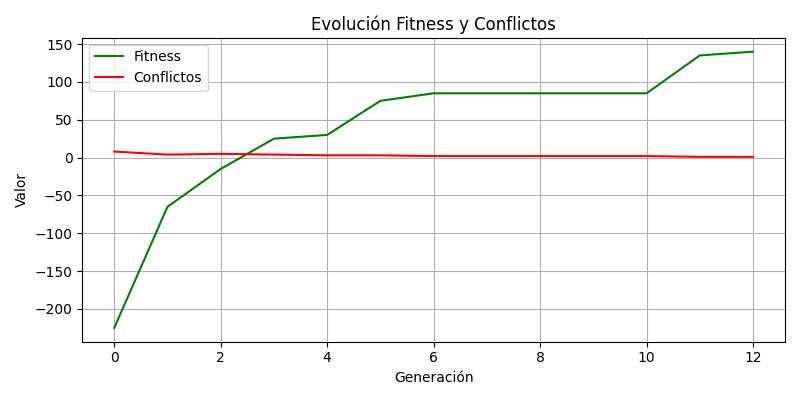

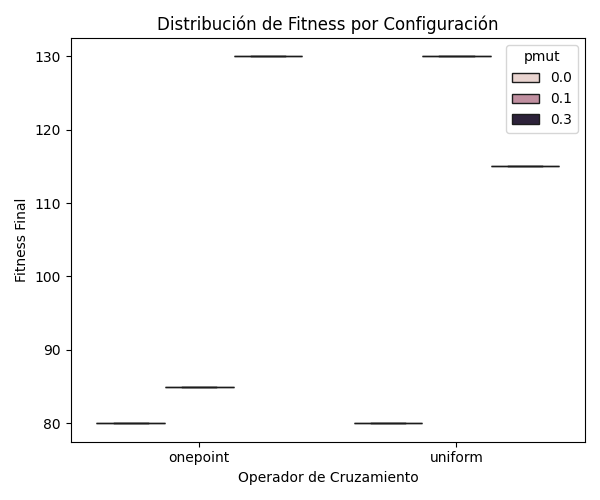

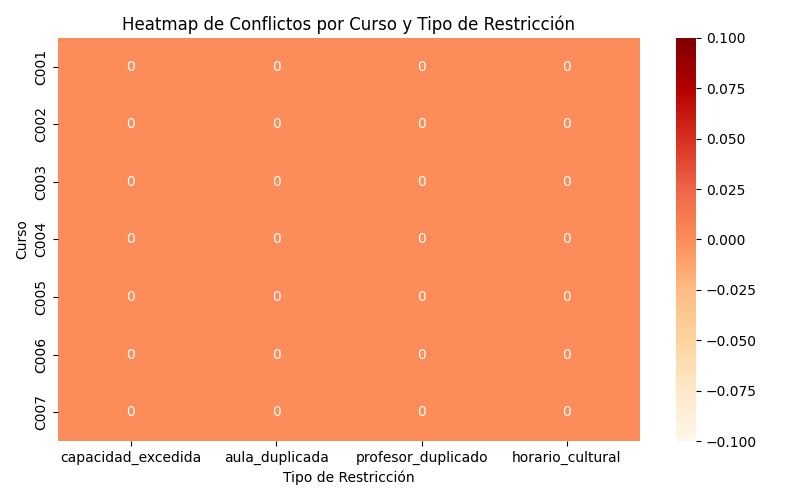

In [ ]:
from IPython.display import Image, display

# Mostrar fitness y conflictos
display(Image(filename='graf_fitness_conflictos.png'))

# Mostrar boxplot
display(Image(filename='graf_boxplot_fitness.png'))

# Mostrar heatmap
display(Image(filename='graf_heatmap_conflictos.png'))